In [1]:
from matplotlib import pyplot as plt
import os

In [2]:
DATASET = "../../output/20240807/val_unslpash-trainset"
GUIDANCES = ["1.0", "3.0", "5.0", "7.0"]
LEARNING_RATES = ["5e-4", "1e-4", "5e-5", "1e-5"]
CHECKPOINTS = ["9", "19", "29", "39", "49"]

In [3]:
def get_average_psnr_from_textfile_in_dir(dir):
    psnr = []
    for file in os.listdir(dir):
        if file.endswith(".txt"):
            with open(os.path.join(dir, file)) as f:
                lines = f.readlines()
                psnr.append(float(lines[0]))
    return sum(psnr) / len(psnr)

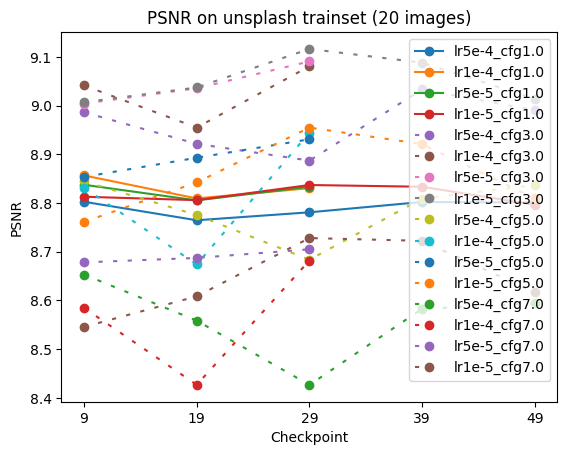

In [31]:
for guidance in GUIDANCES: 
    for lr in LEARNING_RATES:
        psnr = []
        last_index = 0
        for checkpoint in CHECKPOINTS:
            dir = os.path.join(DATASET, f"{guidance}/unsplash-lite/{lr}/chk{checkpoint}/lightning_logs/version_0/psnr")
            if not os.path.exists(dir):
                break
            last_index += 1
            psnr.append(get_average_psnr_from_textfile_in_dir(dir))
        if guidance == "1.0":
            plt.plot(CHECKPOINTS[:last_index], psnr, 'o-', label=f"lr{lr}_cfg{guidance}")
        else:
            plt.plot(CHECKPOINTS[:last_index], psnr, 'o--', dashes=(2,5), label=f"lr{lr}_cfg{guidance}")
plt.title("PSNR on unsplash trainset (20 images)")
plt.xlabel("Checkpoint")
plt.ylabel("PSNR")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

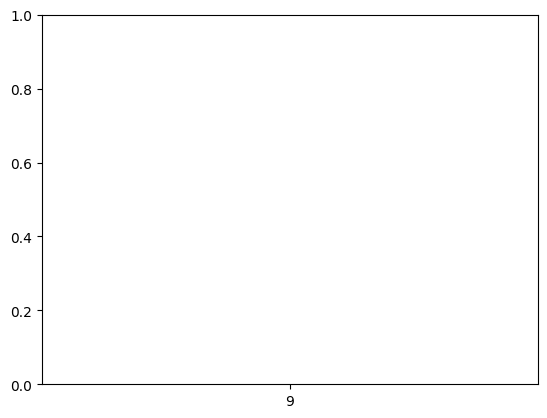

In [10]:
for guidance in ['1.0']: 
    for lr in LEARNING_RATES:
        psnr = []
        last_index = 0
        for checkpoint in CHECKPOINTS:
            dir = os.path.join(DATASET, f"{guidance}/unsplash-lite/{lr}/chk{checkpoint}/lightning_logs/version_0/psnr")
            if not os.path.exists(dir):
                break
            last_index += 1
        psnr.append(get_average_psnr_from_textfile_in_dir(dir))
        print(f"lr{lr}_cfg{guidance}")
        plt.plot(CHECKPOINTS[:last_index], psnr, 'o-', label=f"lr{lr}_cfg{guidance}")
plt.title("PSNR on unsplash trainset (20 images)")
plt.xlabel("Checkpoint")
plt.ylabel("PSNR")
plt.legend()
plt.show()